# PLS - Kısmi En Küçük Kareler Regresyonu

Değişkenlerin daha az sayıda ve aralarında çoklu doğrusal bağlantı problemi olmayan bileşenlere indirgenip regresyon modeli kurulması fikrine dayanır.

PCR ile yaklaşım olarak aynı mantığı ifade ediyor. Bileşenleri indirgeyip bu bileşenlerin üzerine regresyon kurulması 

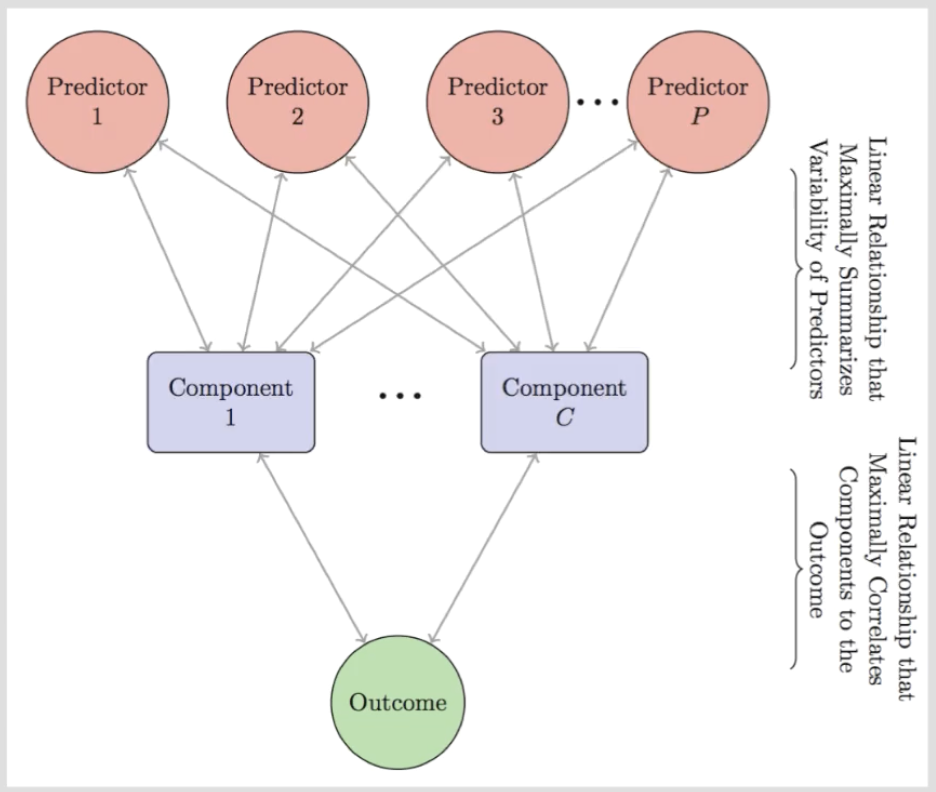

tahminciler(predictor) dediğimiz bağımsız değişkenlerimiz bu bağımsız değişkenlerin bir kombinasyonu yani bileşeni üzerinden bağımlı değişkenin tahmini gerçekleşiyor

tahminciler üzerinden bileşenler oluşur. bu tahmincilere değerlerini gönderdiğimizde doğrusal bir kombinasyon aracılığıyla tahmin değerleri hesaplanmış olur.

boyut indirgeme yaklaşımında p adet değişkenin taşıdığı bilgiyi ondan daha az sayıda değişken ile ifade etmeye çalışmak

örneğin buradaki p adet değişkenin taşıdığı bilgiyi ondan daha az sayıda olan bir c adet bileşenle taşımaya çalışmak olarak düşünülebilir

PCR'dan devam edersek amaç burada yüksek korelasyonlu ya da çok boyut problemi gibi problemlere çözüm sunabiliyor olmasıdır.

### PLS - Kısmi En Küçük Kareler Regresyonu

* Çok boyutlu laneti p > n
* Çoklu doğrusal bağlantı problemi
* PLS'de PCR gibi bağımsız değişkenlerin doğrusal kombinasyonlarını bulur. Bu doğrusal kombinasyonlar bileşen ya da latent değişken olarak adlandırılır.
* PLS NIPALS'in özel bir halidir, iteratif olarak bağımlı değişken ile yüksek korelasyona sahip değişkenler arasındaki gizli (latent) ilişkiyi bulmaya çalışır.

### PCR ile PLS arasındaki fark nedir?

* PCR'da doğrusal kombinasyonlar yani bileşenler **bağımsız değişken uzayındaki değişkenliği** maksimum şekilde özetleyecek şekilde oluşturulur.
* Bu durum bağımlı değişkeni açıklama yeteneği olmamasına sebep olmakta.
* PLS'te ise **bileşenler bağımlı değişken ile olan kovaryansı** maksimum şekilde özetleyecek şekilde oluşturulur.
* Değişkenler atılmak istenmiyorsa ve açıklanabilirlik aranıyorsa: PLS
* PLS, gözetimli boyut indirgeme prosedürü, PCR gözetimsiz boyut indirgeme prosedürü olarak görülebilir.
* İki yönteminde bir tunning parametresi vardır o da bileşen sayısıdır.
* Optimum bileşen sayısını belirlemek için cross validation yöntemi kullanılır.

* PCR'da doğrusal kombinasyonlar yani bileşenler **bağımsız değişken uzayındaki değişkenliği** maksimum şekilde özetleyecek şekilde oluşturulur.
* Bu durum bağımlı değişkeni açıklama yeteneği olmamasına sebep olmakta.
* bileşen indirgemesiyle bağlantıları kırıyor ama bağımsız değişkenlerin tamamen kendi içerisinde bir işleme tabi tutulmasından dolayı bağımlı değişkenin açıklama yeteneği olmayan bir indirgeme işlemi gerçekleşiyor.

- PCR, bağımsız değişkenleri kendi içerisinde değerlendirip bağımlı değişkenle bir ilişki olmaksızın
- PLS, bağımlı değişkene odaklı bir şekilde
- bileşenleri oluşturma işlemi yapılıyor

# PLS - Model

In [1]:
import pandas as pd

In [2]:
hit = pd.read_csv("Hitters.csv")

In [3]:
df = hit.copy()

In [4]:
df = df.dropna()

In [5]:
dms = pd.get_dummies(df[["League","Division","NewLeague"]])
dms.head()

,League_A,League_N,Division_E,Division_W,NewLeague_A,NewLeague_N
1,0,1,0,1,0,1
2,1,0,0,1,1,0
3,0,1,1,0,0,1
4,0,1,1,0,0,1
5,1,0,0,1,1,0


In [6]:
y=df["Salary"]

In [7]:
X_ = df.drop(["Salary","League","Division","NewLeague"], axis=1).astype("float64")
X_.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors
1,315.0,81.0,7.0,24.0,38.0,39.0,14.0,3449.0,835.0,69.0,321.0,414.0,375.0,632.0,43.0,10.0
2,479.0,130.0,18.0,66.0,72.0,76.0,3.0,1624.0,457.0,63.0,224.0,266.0,263.0,880.0,82.0,14.0
3,496.0,141.0,20.0,65.0,78.0,37.0,11.0,5628.0,1575.0,225.0,828.0,838.0,354.0,200.0,11.0,3.0
4,321.0,87.0,10.0,39.0,42.0,30.0,2.0,396.0,101.0,12.0,48.0,46.0,33.0,805.0,40.0,4.0
5,594.0,169.0,4.0,74.0,51.0,35.0,11.0,4408.0,1133.0,19.0,501.0,336.0,194.0,282.0,421.0,25.0


In [8]:
X = pd.concat([X_, dms[["League_N","Division_W","NewLeague_N"]]], axis=1)
X.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,League_N,Division_W,NewLeague_N
1,315.0,81.0,7.0,24.0,38.0,39.0,14.0,3449.0,835.0,69.0,321.0,414.0,375.0,632.0,43.0,10.0,1,1,1
2,479.0,130.0,18.0,66.0,72.0,76.0,3.0,1624.0,457.0,63.0,224.0,266.0,263.0,880.0,82.0,14.0,0,1,0
3,496.0,141.0,20.0,65.0,78.0,37.0,11.0,5628.0,1575.0,225.0,828.0,838.0,354.0,200.0,11.0,3.0,1,0,1
4,321.0,87.0,10.0,39.0,42.0,30.0,2.0,396.0,101.0,12.0,48.0,46.0,33.0,805.0,40.0,4.0,1,0,1
5,594.0,169.0,4.0,74.0,51.0,35.0,11.0,4408.0,1133.0,19.0,501.0,336.0,194.0,282.0,421.0,25.0,0,1,0


In [9]:
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [11]:
from sklearn.cross_decomposition import PLSRegression, PLSSVD

In [12]:
# modeli kuralım
pls_model = PLSRegression().fit(X_train, y_train )

In [13]:
# modelin katsayılarına erişelim
# değişken sayısı kadar katsayı
pls_model.coef_

array([[ 35.32916493],
       [ 48.83425857],
       [ 18.50240933],
       [ 39.28117603],
       [ 30.59952998],
       [ 40.03398345],
       [ 16.85990516],
       [ 28.22289896],
       [ 32.73784993],
       [ 22.00875744],
       [ 33.60903032],
       [ 30.39402522],
       [ 25.73279799],
       [ 54.98835148],
       [  6.56590871],
       [ -0.90894359],
       [ 17.60903423],
       [-37.24246339],
       [ 14.69680385]])

PLS ve PCR'da boyut indirgeme işlemi yapıyoruz. fakat en son kuracak olduğumuz ve tahmin üretmesini beklediğimiz model söz konusu olduğunda ana veri setimizde örneğin 10 tane değişken varsa biz bu değişkenlerin aslında komplesinden kurtulmuyoruz. yeni bir gözlem birimi geldiğini düşünelim. veri iki bileşene indirilmiş ise bu gözlem birimi, hangi değişken değerlerini göndereceğini bilemez. dolayısıyla gözlem birimi veri setinde ilk halinde kaç tane değişken varsa o değişken sayısı adedince gözlem değeri göndermesi gerekir. 10 tane değişken varsa 10 tane değişken değeri gönderir. dolayısıyla bu gözlem değerleri, katsayılar ile hesaplanır ve tahmin değeri bulunur. 

bu yüzden PLS ve PCR'da katsayıları incelediğimizde bunların değişken sayısı kadar oluşması gerekir.

modelleme işleminin yapılması için bileşen sayısının ayarlanması ise ayrı bir işlemdir. bileşen sayısını ayarlayarak model kurma sürecinde bazı problemlerden kurtuluyoruz ve nihayetinde kurmuş olduğumuz modelin tahmin modeli olarak kullanılması süreci söz konusu olduğunda elimizde veri setinde yer alan değişken kadar katsayı olması durumu söz konusu olur ve bir yeni gözlem biriminin bağımsız değişken değerleri modele gönderildiğinde bu katsayıların bir doğrusal kombinasyonu işlemine tabii tutulup bu şekilde bir tahmin değeri oluşuyor. 

In [14]:
# modeli kuralım
# bileşen sayısını 6 yapalım
pls_model = PLSRegression(n_components = 2).fit(X_train, y_train )

In [15]:
# modelin katsayılarına erişelim
# bileşen sayısını azaltmama rağmen yine değişken sayısı kadar katsayı oluştu
pls_model.coef_

array([[ 35.32916493],
       [ 48.83425857],
       [ 18.50240933],
       [ 39.28117603],
       [ 30.59952998],
       [ 40.03398345],
       [ 16.85990516],
       [ 28.22289896],
       [ 32.73784993],
       [ 22.00875744],
       [ 33.60903032],
       [ 30.39402522],
       [ 25.73279799],
       [ 54.98835148],
       [  6.56590871],
       [ -0.90894359],
       [ 17.60903423],
       [-37.24246339],
       [ 14.69680385]])

# PLS - Tahmin

In [18]:
# 2 bileşenli model kurduğumuz halde
# bir sürü değişken değeri var. bunların her birisini alacak
# katsayılar(pls_model.coef_) ile işleme tabii tutup
# y tahmin değerlerini (yani salary, maaş değişken değerlerini) sunmuş olacak
X_train.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,League_N,Division_W,NewLeague_N
183,328.0,91.0,12.0,51.0,43.0,33.0,2.0,342.0,94.0,12.0,51.0,44.0,33.0,145.0,59.0,8.0,1,0,1
229,514.0,144.0,0.0,67.0,54.0,79.0,9.0,4739.0,1169.0,13.0,583.0,374.0,528.0,229.0,453.0,15.0,1,0,1
286,593.0,152.0,23.0,69.0,75.0,53.0,6.0,2765.0,686.0,133.0,369.0,384.0,321.0,315.0,10.0,6.0,0,1,0
102,233.0,49.0,2.0,41.0,23.0,18.0,8.0,1350.0,336.0,7.0,166.0,122.0,106.0,102.0,132.0,10.0,0,0,0
153,341.0,95.0,6.0,48.0,42.0,20.0,10.0,2964.0,808.0,81.0,379.0,428.0,221.0,158.0,4.0,5.0,1,1,1


In [19]:
# y tahmin değerlerini
pls_model.predict(X_train)[0:10]

array([[344.91941493],
       [848.87070769],
       [692.93622642],
       [185.56577984],
       [435.49196077],
       [987.49530026],
       [120.63097106],
       [289.9263406 ],
       [663.41886918],
       [817.90486641]])

In [22]:
# bu tahmin değerleri üzerinden train ve test hatasını validasyon yapmadan hesaplayalım
y_pred = pls_model.predict(X_train)
y_pred[:10]

array([[344.91941493],
       [848.87070769],
       [692.93622642],
       [185.56577984],
       [435.49196077],
       [987.49530026],
       [120.63097106],
       [289.9263406 ],
       [663.41886918],
       [817.90486641]])

In [29]:
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score

### Train Hatası

In [30]:
# eğitim hatası
# rmse
np.sqrt(mean_squared_error(y_train, y_pred))

310.1167593109696

In [31]:
# r-squared
r2_score(y_train, y_pred)

0.5140424486535481

### Test Hatası

In [32]:
# pls_model modelimizi eğitim seti üzerinden kurduk
# pls_model modeli kullanarak tahmin et
# X_test içerisinde varolan bağımsız değişkenlerin değerlerini alacak
# bu modelde hesaplamış olduğumuz katsayılarla işleme tabi tutulacak
# ve her bir gözlem birimi değeri için bir y tahmin değeri hesaplamış olacak
y_pred = pls_model.predict(X_test)

In [33]:
# rmse
np.sqrt(mean_squared_error(y_test, y_pred))

398.09956327448526

In [34]:
# r-squared
r2_score(y_test, y_pred)

0.2678940112232916

beklenildiği gibi test hatası, train hatasından yüksek çıktı.

# PLS - Model Tuning

In [36]:
from sklearn import model_selection

In [37]:
# Cross Validation
cv_10 = model_selection.KFold(n_splits=10, shuffle=True, random_state=1)

In [38]:
# Hata hesaplamak için döngü
RMSE = [] # hata kareler ortalamasının karekökü

for i in np.arange(1, X_train.shape[1] + 1):
    pls = PLSRegression(n_components=i)
    score = np.sqrt(-1 * cross_val_score(pls, X_train, y_train, cv=cv_10, scoring="neg_mean_squared_error").mean())
    RMSE.append(score)

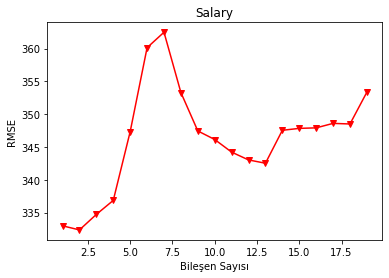

In [39]:
import matplotlib.pyplot as plt
# Sonuçların Görselleştirilmesi
plt.plot(np.arange(1, X_train.shape[1]+1), np.array(RMSE), '-v', c="r")
plt.xlabel("Bileşen Sayısı")
plt.ylabel("RMSE")
plt.title("Salary");

bileşen sayısının iki gibi bir değer olması diğer durumlarla karşılaştırıldığında daha düşük hata kareler ortalamasının karekökü değerini veriyormuş gibi gözüküyor. model bölümünde bileşen sayısını 2 olarak vermiştik. ve test ve train hatasını buna göre hesaplamıştık.

### bileşen sayısı değişken sayısı kadar olursa

In [40]:
# modeli baştan kuralım
# bileşen sayısı değişken sayısı kadar olursa
pls_model = PLSRegression().fit(X_train, y_train )

In [41]:
# modelin katsayılarına erişelim
pls_model.coef_

array([[ 35.32916493],
       [ 48.83425857],
       [ 18.50240933],
       [ 39.28117603],
       [ 30.59952998],
       [ 40.03398345],
       [ 16.85990516],
       [ 28.22289896],
       [ 32.73784993],
       [ 22.00875744],
       [ 33.60903032],
       [ 30.39402522],
       [ 25.73279799],
       [ 54.98835148],
       [  6.56590871],
       [ -0.90894359],
       [ 17.60903423],
       [-37.24246339],
       [ 14.69680385]])

In [42]:
# her gözlemi alacak katsayılar(pls_model.coef_) ile işleme tabii tutup
# y tahmin değerlerini (yani salary, maaş değişken değerlerini) sunmuş olacak
X_train.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,League_N,Division_W,NewLeague_N
183,328.0,91.0,12.0,51.0,43.0,33.0,2.0,342.0,94.0,12.0,51.0,44.0,33.0,145.0,59.0,8.0,1,0,1
229,514.0,144.0,0.0,67.0,54.0,79.0,9.0,4739.0,1169.0,13.0,583.0,374.0,528.0,229.0,453.0,15.0,1,0,1
286,593.0,152.0,23.0,69.0,75.0,53.0,6.0,2765.0,686.0,133.0,369.0,384.0,321.0,315.0,10.0,6.0,0,1,0
102,233.0,49.0,2.0,41.0,23.0,18.0,8.0,1350.0,336.0,7.0,166.0,122.0,106.0,102.0,132.0,10.0,0,0,0
153,341.0,95.0,6.0,48.0,42.0,20.0,10.0,2964.0,808.0,81.0,379.0,428.0,221.0,158.0,4.0,5.0,1,1,1


In [43]:
# bu tahmin değerleri üzerinden train ve test hatasını validasyon yapmadan hesaplayalım
y_pred = pls_model.predict(X_train)
y_pred[:10] # tahmin değerleri

array([[344.91941493],
       [848.87070769],
       [692.93622642],
       [185.56577984],
       [435.49196077],
       [987.49530026],
       [120.63097106],
       [289.9263406 ],
       [663.41886918],
       [817.90486641]])

### Train Hatası

In [44]:
# eğitim hatası
# rmse
np.sqrt(mean_squared_error(y_train, y_pred))

310.1167593109696

In [45]:
# r-squared
r2_score(y_train, y_pred)

0.5140424486535481

### Test Hatası

In [46]:
# pls_model modelimizi eğitim seti üzerinden kurduk
# pls_model modeli kullanarak tahmin et
# X_test içerisinde varolan bağımsız değişkenlerin değerlerini alacak
# bu modelde hesaplamış olduğumuz katsayılarla işleme tabi tutulacak
# ve her bir gözlem birimi değeri için bir y tahmin değeri hesaplamış olacak
y_pred = pls_model.predict(X_test)

In [47]:
# rmse
np.sqrt(mean_squared_error(y_test, y_pred))

398.09956327448526

In [48]:
# r-squared
r2_score(y_test, y_pred)

0.2678940112232916